# Regression_Tree

Importing Library as follows

In [1]:
import pandas as pd
import numpy as np

Importing dataset form local host and get dummy variables

In [2]:
Housing = pd.read_csv("D:/Statistics (Python)/Cases/Real Estate/Housing.csv")
dum_Housing = pd.get_dummies(Housing.iloc[:,1:11], drop_first=True)

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
X = dum_Housing
y = Housing.iloc[:,0]

Create training and test sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, 
                                                    random_state=42)

clf = DecisionTreeRegressor(random_state=2019,max_depth=3)
clf2 = clf.fit(X_train, y_train)

***Ggraphviz***

In [4]:
import graphviz 
from sklearn import tree

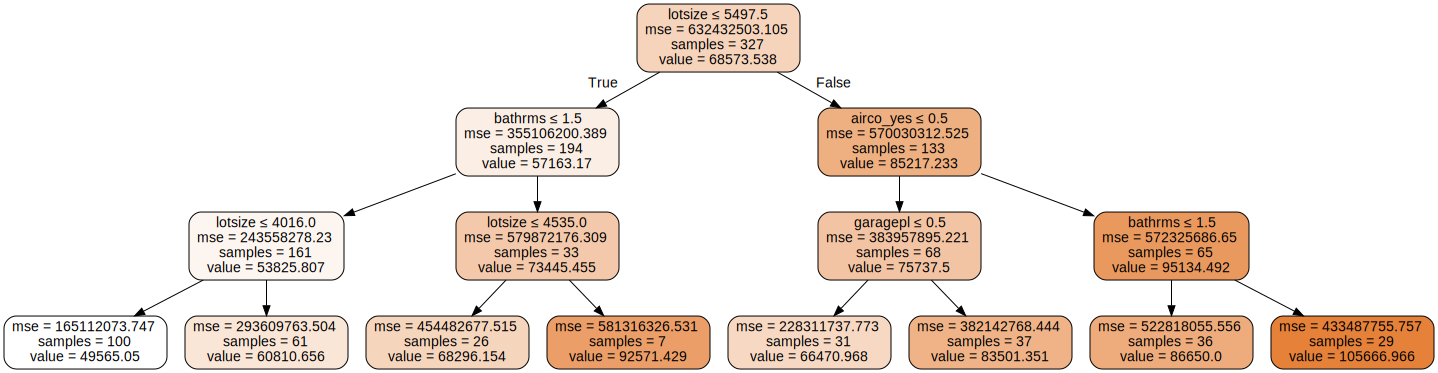

In [5]:
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=list(X_train),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [6]:
y_pred = clf2.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [7]:
print(mean_squared_error(y_test, y_pred) ** 0.5)

21021.02616228657


In [8]:
print(mean_absolute_error(y_test, y_pred))

15317.597471974761


In [9]:
print(r2_score(y_test, y_pred))

0.46720229014641745


Grid Search CV

In [10]:
depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=42)
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeRegressor(random_state=2018)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='r2')

cv.fit(X,y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=2018,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_sam

Best Parameters

In [11]:
print(cv.best_params_)

print(cv.best_score_)

cv.best_estimator_

{'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 20}
0.31204155253825927


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2018, splitter='best')

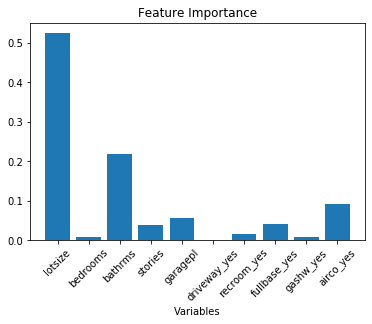

In [13]:
best_model = cv.best_estimator_
import matplotlib.pyplot as plt

best_model.feature_importances_

ind = np.arange(10)
plt.bar(ind,best_model.feature_importances_)
plt.xticks(ind,(X.columns),rotation=45)
plt.title('Feature Importance')
plt.xlabel("Variables")
plt.show()